In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors

In [3]:
# Misc
import sys
sys.path.insert(0, '../misc')
from plots import *

In [4]:
# Own implementations
%load_ext autoreload
%autoreload 2
from diffusion_common import *
from common import *

In [5]:
plt.style.use('../misc/report.mplstyle')

# Toggle to save plots as pdf
save=False
save_dir = "../../../tex/02_neural_nets_on_pdes/img/"

# Some shorthands for figure labels/legends
MSE = r"$\mathrm{MSE}_\mathcal{V}$"

In [6]:
def ftcs_diffusion_dirichlet(u0, T, dx, dt):
    # Number of temporal points
    N = int(1/(dt)) + 1
    t = np.linspace(0, 1, N)
    
    # Number of spatial points
    M = int(1./dx) + 1
    # Full spatial domain (including boundary)
    x = np.linspace(0,1,M)
    
    #Setup iteration matrix for 1D diffusion equation
    A = np.zeros((M - 2,M - 2))
    i,j = np.indices(A.shape)
    A[i == j] = 1 - 2 * dt/dx**2
    A[i == j-1] = dt/dx**2
    A[i == j+1] = dt/dx**2
    
    u = np.empty((N,M))
    # Initial condition
    u[0,1:M-1] = u0(x[1:M-1])
    # Dirichlet boundary
    u[:,0] = 0
    u[:,M-1] = 0
    for n in range(1, N):
        u[n,1:M-1] = A @ u[n-1,1:M-1]
    
    return t, x, u

In [24]:
"""
dxs = np.array([1,2,5,10,20,50,100])* 1e-3
dts = ftcs_cfl_condition(dxs)
us = []
xs = []
ts = []
for dx in dxs:
    print(dx)
    dt = ftcs_cfl_condition(dx)
    t, x, u_ftcs = ftcs_diffusion_dirichlet(u0, 1, dx, dt)
    ts.append(t)
    xs.append(x)
    us.append(u_ftcs)
"""    
for i in [2,3,4,5,6]:
    np.save(f"../data/diffusion/diffusion_solution_ftcs_dx_{dxs[i]:.2e}.npy", us[i])
    np.save(f"../data/diffusion/diffusion_x_dx_{dxs[i]:.2e}.npy", xs[i])
    np.save(f"../data/diffusion/diffusion_t_dx_{dxs[i]:.2e}.npy", ts[i])


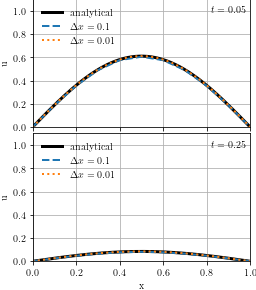

In [20]:
t_snapshot = [0.05, 0.25]
t_snapshot_text = [rf"$t = {t}$" for t in t_snapshot]
save=True
size = (3.9, 2 * 0.618 * 3.9) if save else (10,6)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=size)
for i, t_snap in enumerate(t_snapshot):
    Ns = np.rint(t_snap/dts).astype(int)
    
    ax[i].plot(xs[0], u_analytical(xs[0], t_snap), c="k", lw=3, label=r"analytical")
    ax[i].plot(xs[-1], us[-1][Ns[-1],:], ls="dashed", label=rf"$\Delta x={dxs[-1]}$")
    ax[i].plot(xs[3], us[3][Ns[3],:], ls="dotted", label=rf"$\Delta x={dxs[3]}$")
    ax[i].text(0.98, 0.95, t_snapshot_text[i], transform=ax[i].transAxes, ha="right", va="top")
    ax[i].legend(*ax[i].get_legend_handles_labels(), loc="upper left")
ax[0].set_ylim([0,1.1])
ax[1].set_xlabel(r"x")
ax[0].set_ylabel(r"u")
ax[1].set_ylabel(r"u")
plt.subplots_adjust(wspace=0.05, hspace=0.05)
if save:
    fig.savefig(save_dir + "diffusion_ftcs_vs_analytical.pdf",bbox_inches="tight",pad_inches = 0.02)
else:
    plt.show()

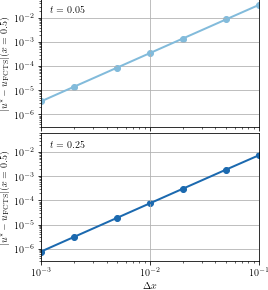

In [21]:
t_snapshot = [0.05, 0.25]
t_snapshot_text = [rf"$t = {t}$" for t in t_snapshot]
save=True
size = (3.9, 2 * 0.618 * 3.9) if save else (10,6)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=size)
for a in ax:
    a.set_xscale("log")
    a.set_yscale("log")

blues = np.array(sns.color_palette("Blues",8))[[3,6]]
for i, t_snap in enumerate(t_snapshot):
    Ns = np.rint(t_snap/dts).astype(int)
    error = []
    for j in range(len(dxs)):
        t = dts[j]*Ns[j]
        j_x = np.rint(0.5/dxs[j]).astype(int)
        error.append(np.abs(u_analytical(j_x * dxs[j], t) - us[j][Ns[j],j_x-1]))
    print()
    ax[i].plot(dxs, error, color=blues[i])
    ax[i].scatter(dxs, error, color=blues[i])
    ax[i].text(0.04, 0.95, t_snapshot_text[i], transform=ax[i].transAxes, ha="left", va="top")
ax[0].set_ylim([3e-7, 6e-2])
ax[1].set_xlabel(r"$\Delta x$")
ax[0].set_ylabel(r"$|u^{*} - u_\mathrm{FCTS}|(x=0.5)$")
ax[1].set_ylabel(r"$|u^{*} - u_\mathrm{FCTS}|(x=0.5)$")
plt.subplots_adjust(wspace=0.05, hspace=0.05)
if save:
    fig.savefig(save_dir + "diffusion_ftcs_spatial_error.pdf",bbox_inches="tight",pad_inches = 0.02)
else:
    plt.show()

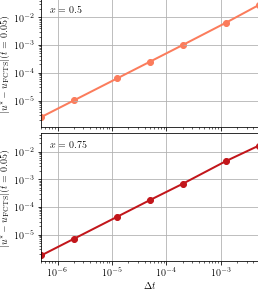

In [22]:
x_snapshot = [0.5, 0.75]
x_snapshot_text = [rf"$x = {x}$" for x in x_snapshot]
save=True
size = (3.9, 2 * 0.618 * 3.9) if save else (10,6)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=size)
for a in ax:
    a.set_xscale("log")
    a.set_yscale("log")

reds = np.array(sns.color_palette("Reds",8))[[3,6]]
for i, x_snap in enumerate(x_snapshot):
    Ns = np.rint(x_snap/dxs).astype(int)
    error = []
    for j in range(len(dts)):
        x = dxs[j]*Ns[j]
        j_x = int(0.05/dts[j])
        error.append(np.abs(u_analytical(x, j_x *dts[j]) - us[j][j_x-1,Ns[j]]))
      
    ax[i].plot(dts, error, color=reds[i])
    ax[i].scatter(dts, error, color=reds[i])
    ax[i].text(0.04, 0.95, x_snapshot_text[i], transform=ax[i].transAxes, ha="left", va="top")
    
#ax[0].set_ylim([1e-8, 1e2])
ax[1].set_xlabel(r"$\Delta t$")
ax[0].set_ylabel(r"$|u^{*} - u_\mathrm{FCTS}|(t=0.05)$")
ax[1].set_ylabel(r"$|u^{*} - u_\mathrm{FCTS}|(t=0.05)$")
plt.subplots_adjust(wspace=0.05, hspace=0.05)
if save:
    fig.savefig(save_dir + "diffusion_ftcs_temporal_error.pdf",bbox_inches="tight",pad_inches = 0.02)
else:
    plt.show()